In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

There are many situation where we may want to compare two probability distributions.

Specifically, we may have a single random variable and two different probability distributions for the variables, such as a true distribution and an approxomationof that distribution.

In situation like this, it can be useful to quantify the difference between the distributions.Generally, this is referred to as the problem of calculating the statistical distance between two statistical objects,e.g. probability distributions.

One approch is to calculate a distance measure between the two distributions.This can be challenging as it can be difficult to interpret the measure.

Instead, it is more common to calculate a divergence between two probability distributions.A divergence is like a measure but is not symmetrical.This means that a divergence is a scoring of how one distribution differs from another,where calculating the divergence for distributions P and Q would give a different score from Q and P.

Divergence scores are an imoortant foundation for many diferent calculations in information theory and more generally in Machine Learning.For example, they provide shortuts for calculating scores such as "mutual information(information gain)" and cross-entropy used as a loss function for classification models.

Divergence scores are also used directly as tools for understanding complex modeling problems, such as approximating a target probability distribution when optimizing GAN(Generative Adversarial Network).

Two commonly used divergence scores from information theory are Killback-Leibler Divergence and Jensen-Shannon Divergence.

# KL Divergence

KL(P || Q) = KL divergence between two distribution P and Q.

In KL(P || Q) , "||" operator indicates "divergence" or Ps divergence from Q


# KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.

KL(P || Q) = - summation over x in xP(x) * log(P(x)/Q(x))

                        or

KL(P || Q) = summation over x in xP(x) * log(Q(x)/P(x))

The intuition for the KL divergence score is that when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence.When the probability from P is small and the probability from Q is large,there is also a large divergence, but not as large as the first case.

It can be used to measure the divergence between discrete and contiuous probability distributions, where in the latter case the integral of the events is calculated instead of the sum of the probabilities of discrete events.

In [10]:
# define distributions
events = ['red','green','blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print("p = %.3f q = %.3f", (sum(p), sum(q)))

p = %.3f q = %.3f (1.0, 1.0)


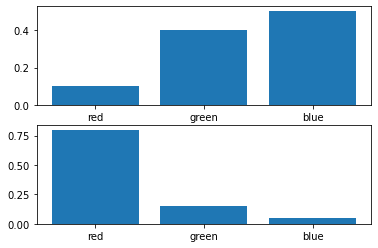

In [12]:
# plot first distribution
plt.subplot(2,1,1)
plt.bar(events, p)
# plot second distribution
plt.subplot(2,1,2)
plt.bar(events,q)
plt.show()

In [32]:
# calculate the kl divegence
def kl_divergence(p, q):
    return sum(np.array([p[i] * math.log2(p[i]/q[i]) for i in range(len(p))]))

1. Here we using log base 2, give units in 'bits'.

2. Here we using log base e, give units in 'nats'.

In [33]:
# calculate (P || Q)
kl_pq = kl_divergence(p,q)
print("KL(P || Q): %.3f bits"% kl_pq)

KL(P || Q): 1.927 bits


In above case,the divergence of P from Q is just under 2 bits

In [34]:
# calculate (Q || P)
kl_qp = kl_divergence(q,p)
print("KL(Q || P): %.3f bits"% kl_qp)

KL(Q || P): 2.022 bits


In above case,the divergence of Q from P as just over 2 bits

Here we use rel_entr() function, from scipy libraries, it takes log base "e". 

In [37]:
from scipy.special import rel_entr
# define distributions
events = ['red','green','blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print("p = %.3f q = %.3f", (sum(p), sum(q)))
# calculate (P || Q)
kl_pq = rel_entr(p,q)
print("KL(P || Q): %.3f bits"% sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q,p)
print("KL(Q || P): %.3f bits"% sum(kl_qp))

p = %.3f q = %.3f (1.0, 1.0)
KL(P || Q): 1.336 bits
KL(Q || P): 1.401 bits


This is intutive if we consider P has large probabilities when Q is small, giveing P less divergence than Q from P as Q has more small probabilities when P has large probabilities.There is more divergence in this second case.

# JS Divergence

JS divergence is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different), when using the base-2 logarithm.

The square root of the score gives a quantity referred to as the JS-distance or JS-distance score.

In [87]:
# calculate KL divergence
def kl_divergence(p,q):
    return sum([p[i] * math.log2(p[i]/q[i]) for i in range(len(p))])
# claculate JS divergence
def js_divergence(p,q):
    m = [0.5 * (p[i] + q[i]) for i in range(len(p))]
    return 0.5 * (kl_divergence(p,m) + kl_divergence(q,m))

In [80]:
# define distributions
events = ['red','green','blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print("p = %.3f q = %.3f", (sum(p), sum(q)))

p = %.3f q = %.3f (1.0, 1.0)


In [81]:
# calculate JS(P || Q)
js_pq = js_divergence(p,q)
print('JS(P || Q) divergence: %.3f bits'%js_pq)
print('JS(P || Q) distance: %.3f'%math.sqrt(js_pq))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648


In [82]:
# calculate JS(Q || P)
js_qp = js_divergence(q,p)
print('JS(Q || P) divergence: %.3f bits'%js_qp)
print('JS(Q || P) distance: %.3f'%math.sqrt(js_qp))

JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


In [85]:
from scipy.spatial.distance import jensenshannon
# define distributions
events = ['red','green','blue']
p = np.array([0.10, 0.40, 0.50])
q = np.array([0.80, 0.15, 0.05])
print("p = %.3f q = %.3f", (sum(p), sum(q)))
# calculate JS(P || Q)
js_pq = jensenshannon(p,q, base = 2)
print('JS(P || Q) divergence: %.3f bits'%(js_pq**2))
print('JS(P || Q) distance: %.3f'%js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(q,p, base = 2)
print('JS(Q || P) divergence: %.3f bits'%(js_qp**2))
print('JS(Q || P) distance: %.3f'%js_qp)

p = %.3f q = %.3f (1.0, 1.0)
JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


In [86]:
from scipy.spatial.distance import jensenshannon
# define distributions
events = ['red','green','blue']
p = np.array([0.10, 0.40, 0.50])
q = np.array([0.80, 0.15, 0.05])
print("p = %.3f q = %.3f", (sum(p), sum(q)))
# calculate JS(P || Q)
js_pq = jensenshannon(p,q)
print('JS(P || Q) divergence: %.3f bits'%(js_pq**2))
print('JS(P || Q) distance: %.3f'%js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(q,p)
print('JS(Q || P) divergence: %.3f bits'%(js_qp**2))
print('JS(Q || P) distance: %.3f'%js_qp)

p = %.3f q = %.3f (1.0, 1.0)
JS(P || Q) divergence: 0.291 bits
JS(P || Q) distance: 0.540
JS(Q || P) divergence: 0.291 bits
JS(Q || P) distance: 0.540
